# Online Auction Analytics _[Kaggle competition](https://www.kaggle.com/c/facebook-recruiting-iv-human-or-bot)_

## Is the bid made by Human or by Robot?

## About this notebook

This notebook is the first part of classification. All the models are not tuned and over-sampled. The models will be used in this notebook are:
1. Random Forest
2. k-Nearest-Neighbors (k-NN)
3. Logistic Regression
4. AdaBoost

#### Classification models
k-NN and Logistic Regression are two basic methods that people always use in building classification models.

Random Forest and AdaBoost are two ensemble methods which can give us better results. But they are also time-consuming --- about 10 times more than logistic regression.

#### Import packages

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scikitplot.plotters import plot_roc_curve

#### Load and display data

In [2]:
%run load_process.py

,avg_dev,avg_num_bids,avg_num_cou,avg_speed,max_dev,max_num_bids,max_num_cou,max_speed,min_dev,min_num_bids,min_num_cou,min_speed,merchandise,country,device
bidder_id,,,,,,,,,,,,,,,
91a3c57b13234af24875c56fb7e2b2f4rb56a,1.333333,1.333333,1.333333,0.008000,3,3,3,0.116564,1,1,1,0.000000,5,6,14
624f258b49e77713fc34034560f93fb3hu3jo,3.000000,3.000000,3.000000,0.000464,3,3,3,0.000464,3,3,3,0.000464,8,1,2
1c5f4fc669099bfbfac515cd26997bd12ruaj,1.000000,1.000000,1.000000,0.000000,1,1,1,0.000000,1,1,1,0.000000,9,1,2
4bee9aba2abda51bf43d639013d6efe12iycd,1.000000,1.000000,1.000000,0.000000,1,1,1,0.000000,1,1,1,0.000000,1,1,1
4ab12bc61c82ddd9c2d65e60555808acqgos1,6.739130,6.739130,6.739130,0.008155,38,38,38,0.137184,1,1,1,0.000000,8,2,53


,avg_dev,avg_num_bids,avg_num_cou,avg_speed,max_dev,max_num_bids,max_num_cou,max_speed,min_dev,min_num_bids,min_num_cou,min_speed,merchandise,country,device
bidder_id,,,,,,,,,,,,,,,
49bb5a3c944b8fc337981cc7a9ccae41u31d7,1.333333,1.333333,1.333333,0.000147,2.0,2.0,2.0,0.000440,1.0,1.0,1.0,0.0,4,3.0,2.0
a921612b85a1494456e74c09393ccb65ylp4y,1.500000,1.500000,1.500000,9.500000,2.0,2.0,2.0,19.000000,1.0,1.0,1.0,0.0,8,2.0,3.0
6b601e72a4d264dab9ace9d7b229b47479v6i,1.214286,1.214286,1.214286,0.050269,2.0,2.0,2.0,0.593750,1.0,1.0,1.0,0.0,6,3.0,4.0
eaf0ed0afc9689779417274b4791726cn5udi,1.644444,1.644444,1.644444,0.106486,15.0,15.0,15.0,3.800000,1.0,1.0,1.0,0.0,3,14.0,81.0
cdecd8d02ed8c6037e38042c7745f688mx5sf,1.150000,1.150000,1.150000,0.003218,2.0,2.0,2.0,0.062706,1.0,1.0,1.0,0.0,5,2.0,17.0


#### Define functions

In [27]:
def build_models(model_name):
    if model_name == 'rfc':
        rfc = RandomForestClassifier(random_state=42)
        rfc.fit(X_train, y_train)
        score = rfc.score(X_test, y_test)
        print('Test score: {:.5f}'.format(score))
        _ = plot_roc_curve(y_test, rfc.predict_proba(X_test))
    if model_name == 'knn':
        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        print('Test score: {:.5f}'.format(score))
        _ = plot_roc_curve(y_test, knn.predict_proba(X_test))
    if model_name == 'lgr':
        lgr = LogisticRegression(random_state = 42)
        lgr.fit(X_train, y_train)
        score = lgr.score(X_test, y_test)
        print('Test score: {:.5f}'.format(score))
        _ = plot_roc_curve(y_test, lgr.predict_proba(X_test))
    if model_name == 'ada':
        ada = AdaBoostClassifier(random_state = 42)
        ada.fit(X_train, y_train)
        score = ada.score(X_test, y_test)
        print('Test score: {:.5f}'.format(score))
        _ = plot_roc_curve(y_test, ada.predict_proba(X_test))

#### Train-Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size = 0.2)

#### Random Forest (without tuning)

Test score: 0.94710


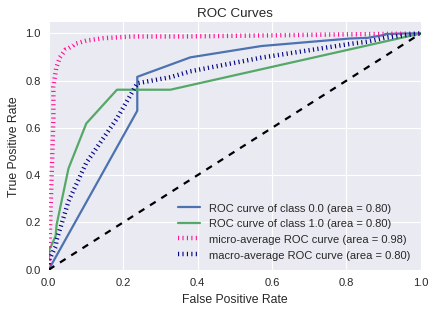

In [28]:
build_models('rfc')

#### k-Nearest-Neighbors (without tuning)

Test score: 0.94458


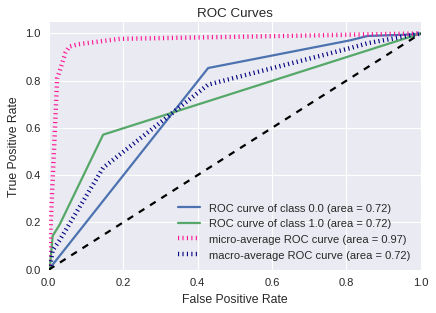

In [29]:
build_models('knn')

#### Logistic Regression (without tuning)

Test score: 0.94710


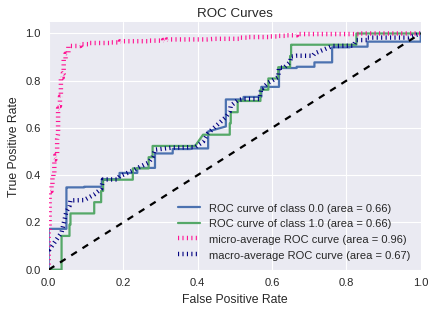

In [30]:
build_models('lgr')

#### AdaBoost (without tuning)

Test score: 0.94710


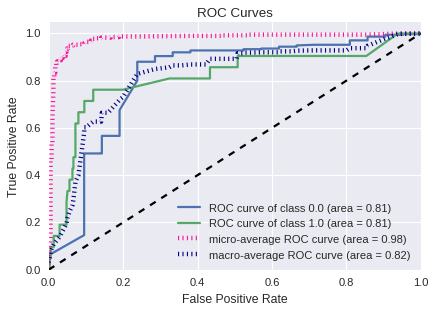

In [31]:
build_models('ada')

### As the results, Adaboost and Random Forest (two ensemble classification methods) give the best prediction results. While logistic regression have the worst one.

### Next step: tuning the models